In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import NMF

sns.set_theme()

In [6]:
X = np.array(
    [[5, 3, 0, 1], [4, 0, 0, 1], [1, 1, 0, 5], [1, 0, 0, 4], [0, 1, 5, 4]],
    dtype=np.float32,
)

model = NMF(n_components=3)
W = model.fit_transform(X)
H = model.components_

<Axes: >

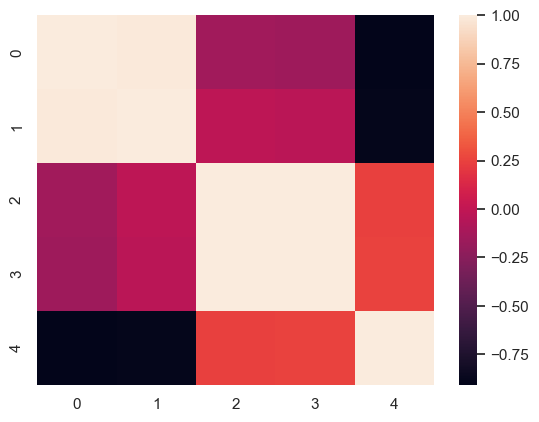

In [16]:
sns.heatmap(np.corrcoef(W @ H))

In [18]:
np.round(W @ H, 2)

array([[5.34, 2.14, 0.17, 1.01],
       [3.46, 1.37, 0.  , 0.98],
       [1.17, 0.56, 0.09, 5.01],
       [0.85, 0.4 , 0.  , 3.99],
       [0.  , 1.04, 4.99, 4.  ]], dtype=float32)

In [19]:
X

array([[5., 3., 0., 1.],
       [4., 0., 0., 1.],
       [1., 1., 0., 5.],
       [1., 0., 0., 4.],
       [0., 1., 5., 4.]], dtype=float32)

## Non-negative Matrix Factorization Recommender
https://acme.byu.edu/00000179-af53-d74f-a3ff-bfdb224d0000/nmf-pdf

In [50]:
df = pd.DataFrame(
    {
        "John": [0, 2, 1, 0, 0],
        "Alice": [1, 3, 1, 2, 0],
        "Mary": [0, 1, 1, 3, 0],
        "Greg": [1, 1, 0, 4, 0],
        "Peter": [2, 2, 1, 1, 1],
        "Jennifer": [2, 2, 1, 1, 0],
    },
    index="vegetables fruits sweets bread coffee".split(),
)
df

,John,Alice,Mary,Greg,Peter,Jennifer
vegetables,0,1,0,1,2,2
fruits,2,3,1,1,2,2
sweets,1,1,1,0,1,1
bread,0,2,3,4,1,1
coffee,0,0,0,0,1,0


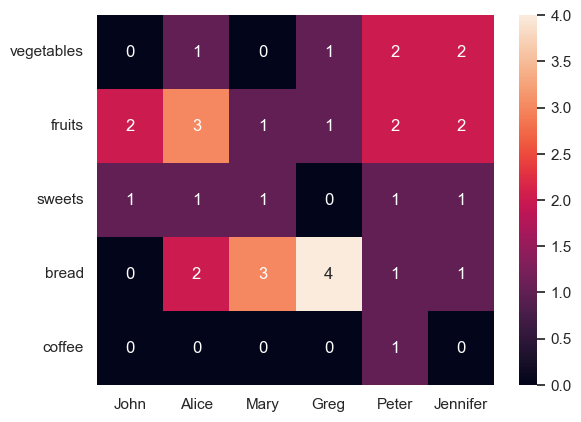

In [53]:
sns.heatmap(df, annot=True)

plt.yticks(rotation=0)
pass

In [37]:
model = NMF(n_components=3)
W = model.fit_transform(df)
H = model.components_

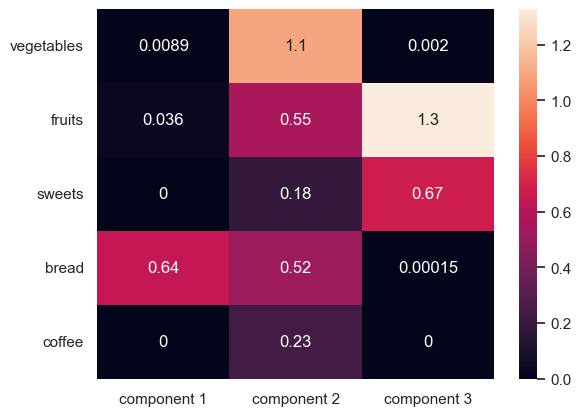

In [54]:
sns.heatmap(
    pd.DataFrame(
        W, index=df.index, columns=["component 1", "component 2", "component 3"]
    ),
    annot=True,
)
plt.yticks(rotation=0)
pass

`W` represents how much each grocery feature contributes to each component; a higher weight means it's more important to that component.

In [55]:
sns.heatmap(
    pd.DataFrame(
        H, index=["component 1", "component 2", "component 3"], columns=df.columns
    ),
    annot=True,
)
plt.yticks(rotation=0)
pass

,John,Alice,Mary,Greg,Peter,Jennifer
component 1,0.000000,2.434610,4.664494,5.577052,0.000000,0.157663
component 2,0.000000,0.871472,0.000000,0.846342,1.924870,1.735532
component 3,1.503022,1.712571,0.801863,0.151135,0.757168,0.827288


`H` is similar, except instead of showing how much each grocery category affects the components, it shows how much each person belongs to the comopnent, again with a higher weight indicating that the person belongs more in that component.

In [49]:
pd.DataFrame(W @ H, index=df.index, columns=df.columns).round(2)

,John,Alice,Mary,Greg,Peter,Jennifer
vegetables,0.00,0.98,0.04,0.98,2.11,1.90
fruits,2.00,2.84,1.23,0.87,2.07,2.06
sweets,1.01,1.31,0.54,0.26,0.86,0.87
bread,0.00,2.01,2.99,4.01,0.99,1.00
coffee,0.00,0.20,0.00,0.20,0.45,0.41


In [47]:
df

,John,Alice,Mary,Greg,Peter,Jennifer
vegetables,0,1,0,1,2,2
fruits,2,3,1,1,2,2
sweets,1,1,1,0,1,1
bread,0,2,3,4,1,1
coffee,0,0,0,0,1,0
